In [1]:
# Installing tensorflow
!pip install tensorflow

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/ANN/data.csv')
# Knowing the data
df.head()
# all are nummerical columns and one empty column present in the sheet,'unnamed', the target variable is diagnosis colum
# null values present in last column'
df.isnull().sum()
df.duplicated().sum().any()# no duplicate values





np.False_

In [4]:
# getting to know the data
df['diagnosis'].value_counts()# Benign cases are more compared to malignant,which shows data is slightly imbalanced
# removing the unnecessary columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# mapping the output into numerical values
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Separating input and output
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [7]:
# Scaling the input
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
# Wanted X as df
X=pd.DataFrame(X,columns=df.drop('diagnosis',axis=1).columns)
X.head()




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


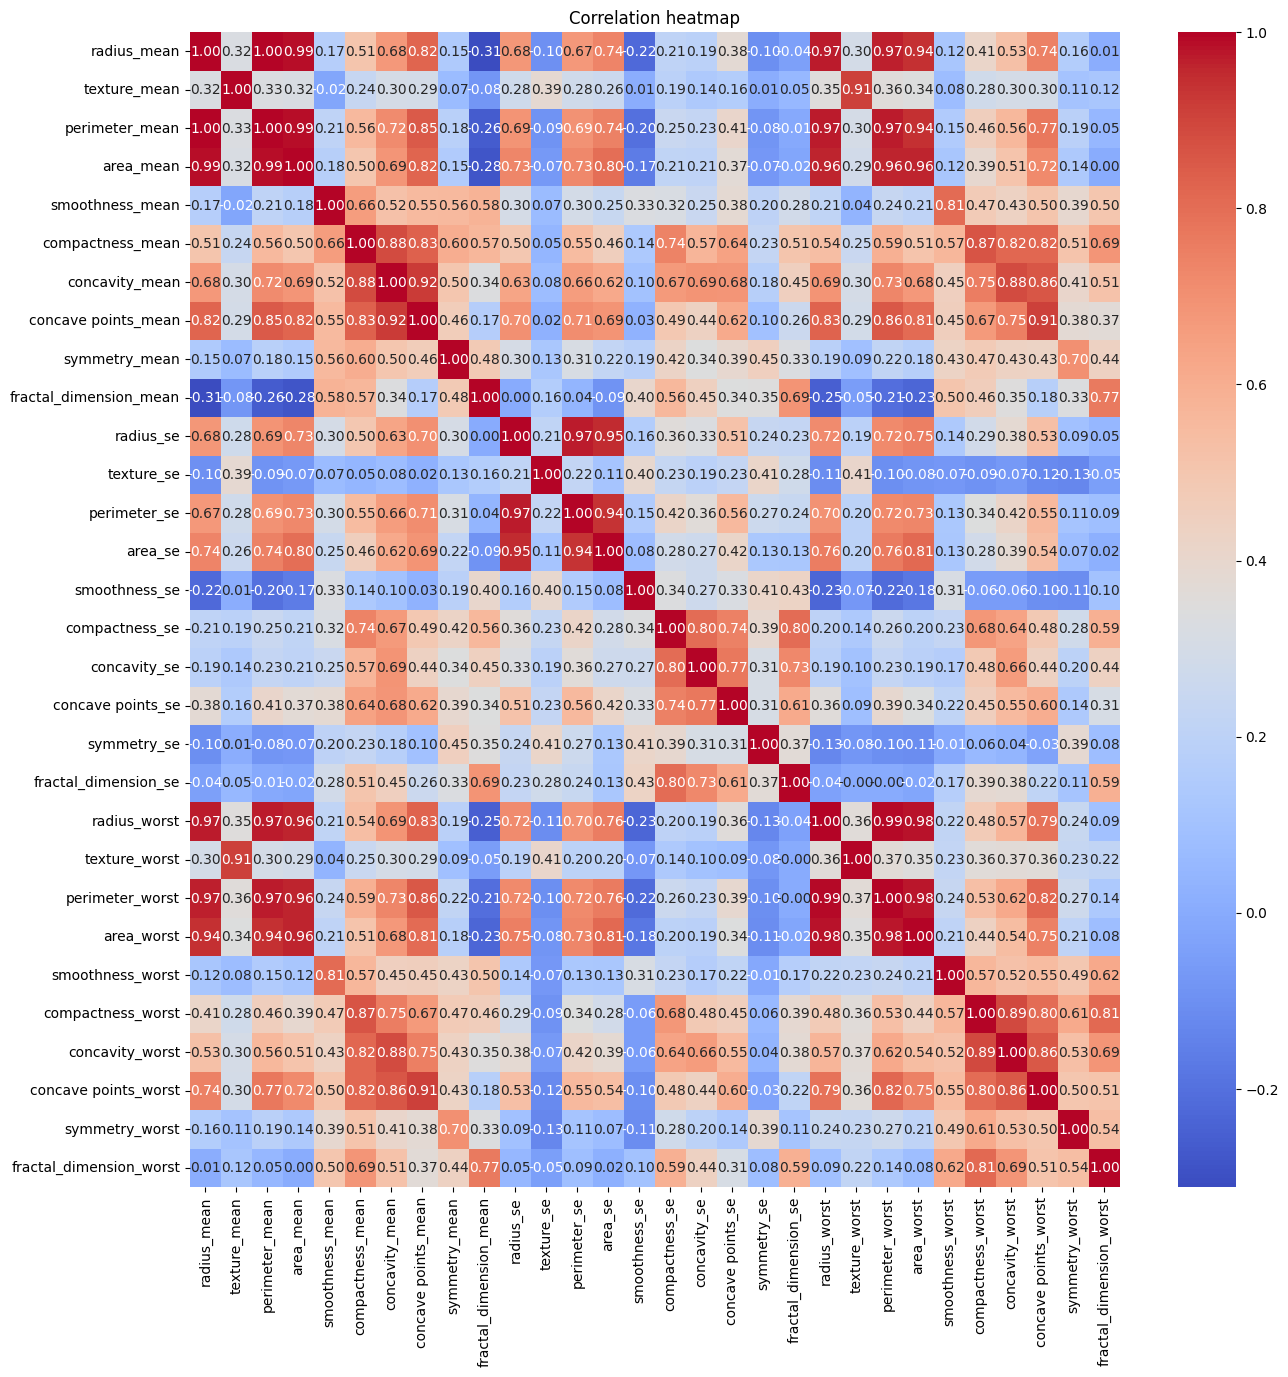

In [8]:
# EDA
X.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation heatmap')
sns.heatmap(X.corr(),annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

In [9]:
# From the above heatmap it is observed that radius, perimeter and area parameters are highly correlated and hence only one among them can be considered.
X=X.drop(['perimeter_mean','perimeter_se','perimeter_worst','area_mean','area_se','area_worst'],axis=1)


In [10]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,1.886690,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,1.805927,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,1.511870,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,-0.281464,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,1.298575,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# End of EDA

In [11]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(units=16,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
# Training the model
history=model.fit(X_train,y_train,validation_split=0.1,epochs=20,batch_size=32,verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3885 - loss: 0.8876 - val_accuracy: 0.5652 - val_loss: 0.7171
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5629 - loss: 0.6767 - val_accuracy: 0.7609 - val_loss: 0.5327
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7849 - loss: 0.5398 - val_accuracy: 0.8478 - val_loss: 0.4238
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8315 - loss: 0.4590 - val_accuracy: 0.9130 - val_loss: 0.3584
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8820 - loss: 0.3860 - val_accuracy: 0.9348 - val_loss: 0.3139
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9038 - loss: 0.3302 - val_accuracy: 0.9565 - val_loss: 0.2831
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9149 - loss: 0.3008 - val_accuracy: 0.9565 - val_loss: 0.2592
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9361 - loss: 0.2755 - val_accuracy: 0.9565 - val_los

In [ ]:
# training accuracy=0.9895 and validation accuracy=0.9783, which shows it is an optimal model.

In [15]:
# Evaluating the model on test data
loss,accuracy=model.evaluate(X_test,y_test)
print('Test loss:',loss)
print('Test accuracy:',accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9467 - loss: 0.1363
Test loss: 0.13089901208877563
Test accuracy: 0.9473684430122375


In [ ]:
# Good model

In [ ]:
# plots

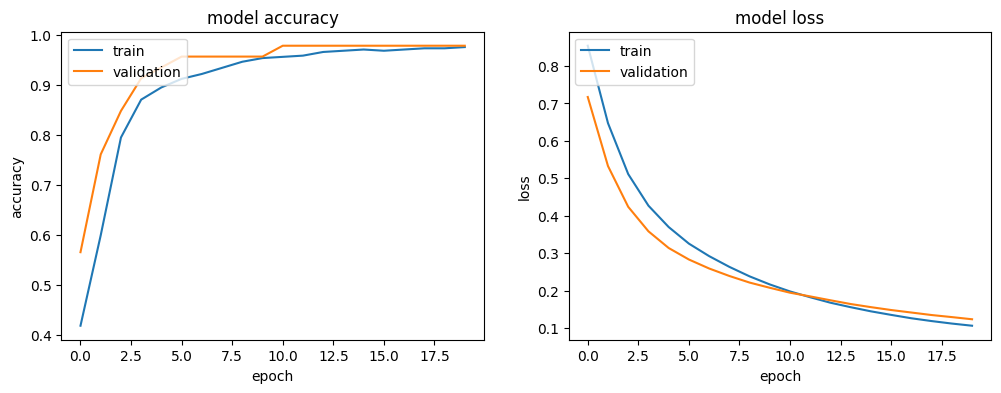

In [28]:
# Accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# here the accuracy curve is almost getting saturated, so the model build is quite good enough.